### Claude Shyaka
### ID#:

# Homework 1: Estimate Housing Price Using Linear Regression With Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
housing = pd.read_csv('./data/Housing.csv', delimiter=',')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
m = len(housing)
m

545

In [5]:
housing.shape

(545, 13)

In [6]:
# The dataset has many columns with 'Yes' and 'No'

# List of variable to map to numerical values.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', \
           'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
# Helper function to reshape the input matrix as a column vector and append X0.
def transform_and_append_X0(X, m, n):
    # Reshape the input matrix as a column vector
    X_ = X.reshape(m, n)

    # Create the X0 column vector
    X0 = np.ones((m, 1))

    # Combine the input matrix with the X0 vector
    X = np.hstack((X0, X_))
    
    return X

In [8]:
def compute_loss(X, y, m, theta):
    """
    Compute loss for linear regression.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    
    Output Parameters
    -----------------
    J : Scalar values. 
    """
    predictions = X.dot(theta) # predictions = h
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2*m) * np.sum(sqrErrors)
    
    return J

In [9]:
def compute_loss2(X, y, m, lam, theta):
    """
    Compute loss for linear regression with parameter penalization.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    
    Output Parameters
    -----------------
    J : Scalar values. 
    """
    predictions = X.dot(theta) # predictions = h
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta[1:])
    J = 1 / (2*m) * (np.sum(sqrErrors) + (lam*np.sum(sqrTheta)))
    
    return J

In [10]:
def gradient_descent(X_train, y_train, m_train, X_test, y_test, m_test, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    alpha : Learning rate. Scalar value.
    iterations: Number of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : Final value. 1xn array of fitting parameters of weights. Dimension (1xn)
    cost_history : Contains value of cost for each iteration. Dimension (mx1)
    """
    train_loss_history = np.zeros(iterations)
    test_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_train.dot(theta) # prediction (m,1)
        errors = np.subtract(predictions, y_train) # Error (m,1) = temp
        sum_delta = (alpha/m_train) * X_train.transpose().dot(errors) # sum_delta (n,1)
        # print("sum delta\n", sum_delta)
        theta = theta - sum_delta
        train_loss_history[i] = compute_loss(X_train, y_train, m_train, theta)
        test_loss_history[i] = compute_loss(X_test, y_test, m_test, theta)
    
    return theta, train_loss_history, test_loss_history

In [11]:
def gradient_descent2(X_train, y_train, m_train, X_test, y_test, m_test, theta, alpha, lam, iterations):
    """
    Compute cost for linear regression with parameter penalization.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    alpha : Learning rate. Scalar value.
    iterations: Number of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : Final value. 1xn array of fitting parameters of weights. Dimension (1xn)
    cost_history : Contains value of cost for each iteration. Dimension (mx1)
    """
    train_loss_history = np.zeros(iterations)
    test_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_train.dot(theta) # prediction (m,1)
        errors = np.subtract(predictions, y_train) # Error (m,1) = temp
        sum_delta = (alpha/m_train) * X_train.transpose().dot(errors) # sum_delta (n,1)

        theta[0] = theta[0] - sum_delta[0]
        theta[1:] = ((1 - (alpha*(lam/m_train)))*theta[1:]) - sum_delta[1:]
        
        train_loss_history[i] = compute_loss2(X_train, y_train, m_train, lam, theta)
        test_loss_history[i] = compute_loss(X_test, y_test, m_test, theta)
    
    return theta, train_loss_history, test_loss_history

In [12]:
# Linear regression with parameter penalization
def RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations):
    
    # Get train set dimensions
    m_train = len(X_train)
    n_train = len(X_train[0, :])
    
    # Get test set dimensions
    m_test = len(X_test)
    n_test = len(X_test[0, :])
    
    # Check if number of features in test set is the same as train set
    if n_test != n_train:
        return "Error: Check your number of features!"

    # Reshape the input matrix as a column vector and append X0.
    X_train = transform_and_append_X0(X_train, m_train, n_train)
    X_test = transform_and_append_X0(X_test, m_test, n_test)

    # Initialize the theta parameters
    theta = np.zeros((n_train+1, 1))

    # compute the train cost for theta values
    train_loss = compute_loss2(X_train, y_train, m_train, lam, theta)
    print('Initial train set cost for given values of thetas =', train_loss)
    
    # compute the test cost for theta values
    test_loss = compute_loss(X_test, y_test, m_test, theta)
    print('Initial test set cost for given values of thetas =', test_loss)

    # Initialize theta.
    theta = np.zeros((n_train+1))

    # Run the gradient descent with the given parameter
    theta, train_loss_history, test_loss_history = gradient_descent2(X_train, y_train, m_train, 
                                                                    X_test, y_test, m_test,
                                                                    theta, alpha, lam, iterations)
    return theta, train_loss_history, test_loss_history


In [13]:
# Split the Data into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the
# the same rows, respectively 
np.random.seed(42)
df_train, df_test = train_test_split(housing, train_size=0.8,
                                     test_size=0.2)
df_train.shape

(436, 13)

In [14]:
df_test.shape

(109, 13)

## Problem 2.a
### Using MinMaxScaler

In [15]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories', 'parking', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [16]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler() 

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [17]:
# initialize alpha and number of iterations
alpha = 0.05
lam = 7
iterations = 10000

In [18]:
# Evaluate loss for on training set
theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations)
print("Final values of theta\n", theta)
print("Last ten train_loss_history values\n", train_loss_history)
print("Last ten test_loss_history values\n", test_loss_history)

Initial train set cost for given values of thetas = 23.38076507586667
Initial test set cost for given values of thetas = 6.400204637281909
Final values of theta
 [0.10431299 0.25795173 0.08447601 0.22120221 0.13774687 0.11599655]
Last ten train_loss_history values
 [0.04796848 0.04305377 0.03878375 ... 0.00790542 0.00790542 0.00790542]
Last ten test_loss_history values
 [0.05282619 0.0477032  0.0432477  ... 0.00922959 0.00922959 0.00922959]


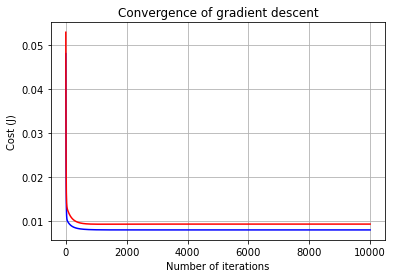

In [19]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue')
plt.plot(range(1, iterations+1), test_loss_history, color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()